 # Import Libraries, Preferences, & Helper Functions

## Libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import title
from pyparsing import alphas

## Preferences

In [2]:
# Suppress warnings
warnings.filterwarnings('ignore')

# Set the default Seaborn style
sns.set_theme(style='whitegrid', font='serif')

# Dataset URL
DATASETURL = 'https://raw.githubusercontent.com/aelluminate/databank/refs/heads/main/2024-10/members-exercise/members-exercise.csv'

## Helper Functions

### Age Group Function

In [3]:
def age_group(age):
    if 18 <= age <= 25:
        return '18-25'
    elif 26 <= age <= 35:
        return '26-35'
    elif 36 <= age <= 45:
        return '36-45'
    elif 46 <= age <= 55:
        return '46-55'
    elif 56 <= age <= 65:
        return '56-65'
    else:
        return '66+'

# II. Exploratory Data Analysis

In [4]:
# Load the dataset
data = pd.read_csv(DATASETURL)

# Preview the first 5 rows
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [5]:
# Display the dataset's shape
data.shape

(973, 15)

In [6]:
# Display the dataset's info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [7]:
# Display the dataset's summary statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,973.0,38.683453,12.180928,18.00,28.00,40.00,49.00,59.00
Weight (kg),973.0,73.854676,21.207500,40.00,58.10,70.00,86.00,129.90
Height (m),973.0,1.722580,0.127720,1.50,1.62,1.71,1.80,2.00
Max_BPM,973.0,179.883864,11.525686,160.00,170.00,180.00,190.00,199.00
Avg_BPM,973.0,143.766701,14.345101,120.00,131.00,143.00,156.00,169.00
Resting_BPM,973.0,62.223022,7.327060,50.00,56.00,62.00,68.00,74.00
Session_Duration (hours),973.0,1.256423,0.343033,0.50,1.04,1.26,1.46,2.00
Calories_Burned,973.0,905.422405,272.641516,303.00,720.00,893.00,1076.00,1783.00
Fat_Percentage,973.0,24.976773,6.259419,10.00,21.30,26.20,29.30,35.00
Water_Intake (liters),973.0,2.626619,0.600172,1.50,2.20,2.60,3.10,3.70


In [8]:
# Display the dataset's missing values
data.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [9]:
# Display the duplicate rows
data.duplicated().sum()

np.int64(0)

In [10]:
# Display the dataset's unique values
data.nunique()

Age                               42
Gender                             2
Weight (kg)                      532
Height (m)                        51
Max_BPM                           40
Avg_BPM                           50
Resting_BPM                       25
Session_Duration (hours)         147
Calories_Burned                  621
Workout_Type                       4
Fat_Percentage                   239
Water_Intake (liters)             23
Workout_Frequency (days/week)      4
Experience_Level                   3
BMI                              771
dtype: int64

In [11]:
# Preview numerical and categorical columns
numerical = data.select_dtypes(include=np.number).columns.tolist()
categorical = data.select_dtypes(exclude=np.number).columns.tolist()

print(f'Numerical Columns\n{numerical}\n')
print(f'Categorical Columns\n{categorical}')

Numerical Columns
['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI']

Categorical Columns
['Gender', 'Workout_Type']


In [12]:
# Preview categorical values
data[categorical].head()

,Gender,Workout_Type
0,Male,Yoga
1,Female,HIIT
2,Female,Cardio
3,Male,Strength
4,Male,Strength


## Visualizations

### Gender Distribution

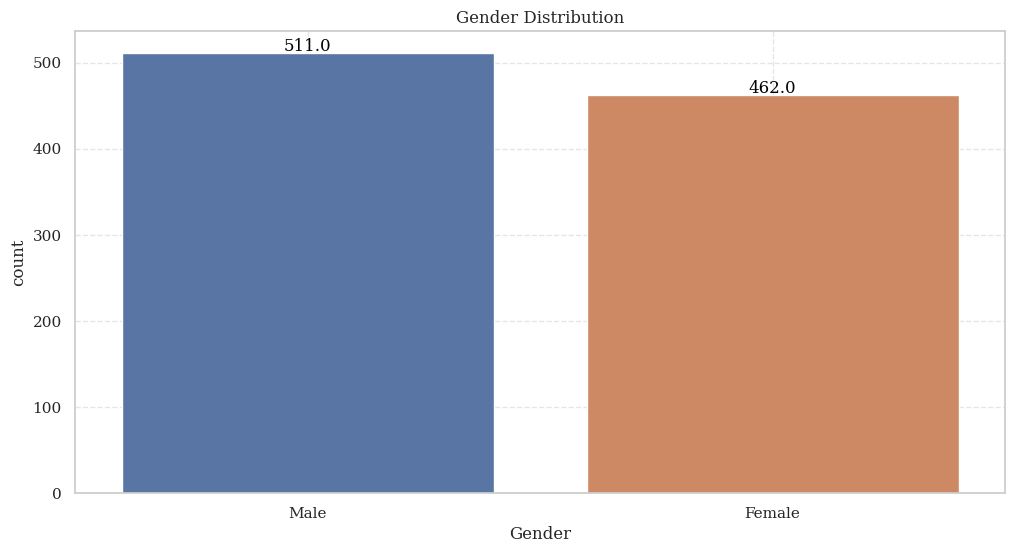

In [13]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Plot the gender distribution
sns.countplot(data, x='Gender', hue='Gender')
plt.title('Gender Distribution')

# Add annotations
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', color='black', xytext=(0, 5),
                       textcoords='offset points')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Display the plot
plt.show()

### Correlation Matrix

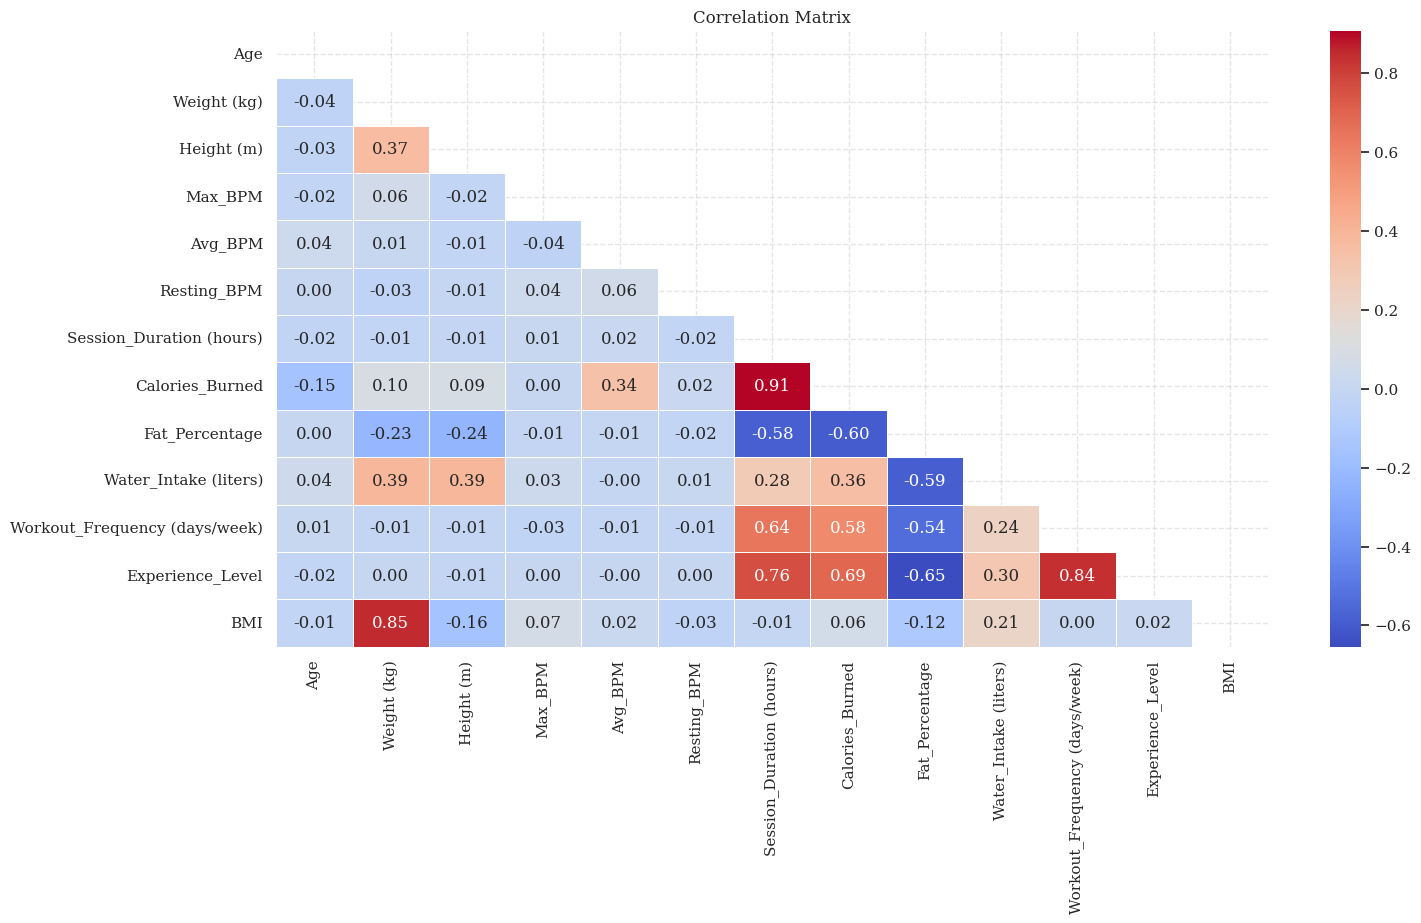

In [14]:
# Compute the correlation matrix
numerical_data = data[numerical]
corr = numerical_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(16, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, mask=np.triu(corr))
plt.title('Correlation Matrix')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Display the plot
plt.show()

### Weight vs BMI based by Gender


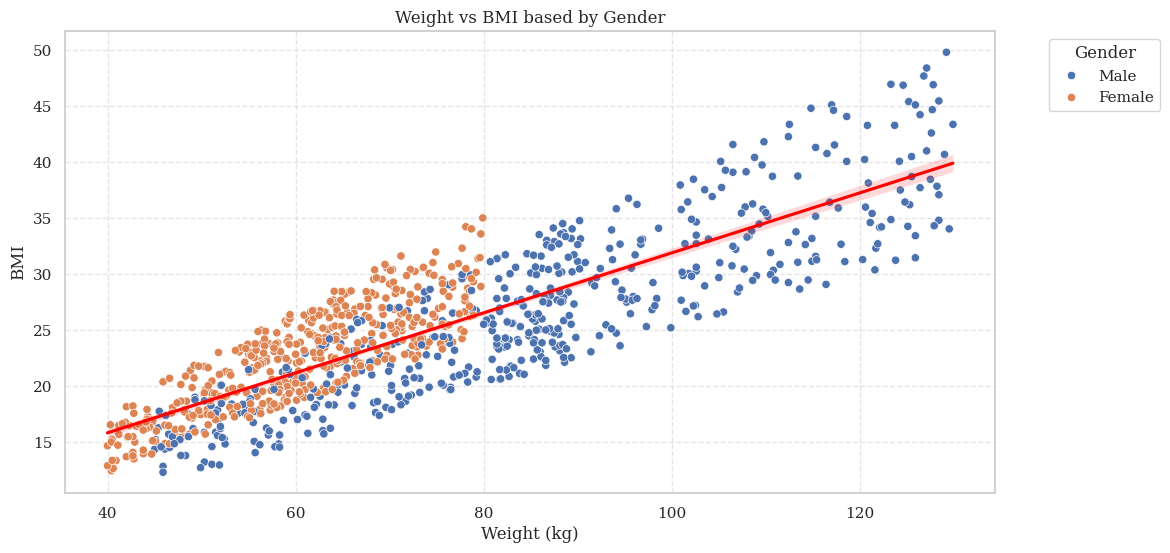

In [15]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Plot the weight vs BMI
sns.scatterplot(data=data, x='Weight (kg)', y='BMI', hue='Gender')
plt.title('Weight vs BMI based by Gender')

# Add trendline
sns.regplot(data=data, x='Weight (kg)', y='BMI', scatter=False, color='red')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Place the legend in the outside the plot
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

### Age Distribution

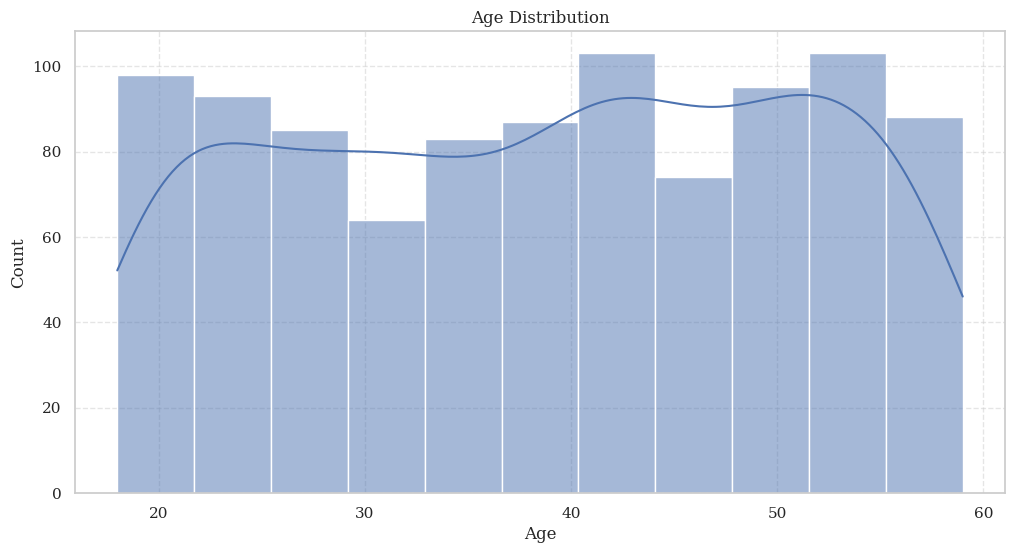

In [16]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Plot the age distribution
sns.histplot(data, x='Age', kde=True)
plt.title('Age Distribution')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Display the plot
plt.show()

### Weight vs BMI based by Age

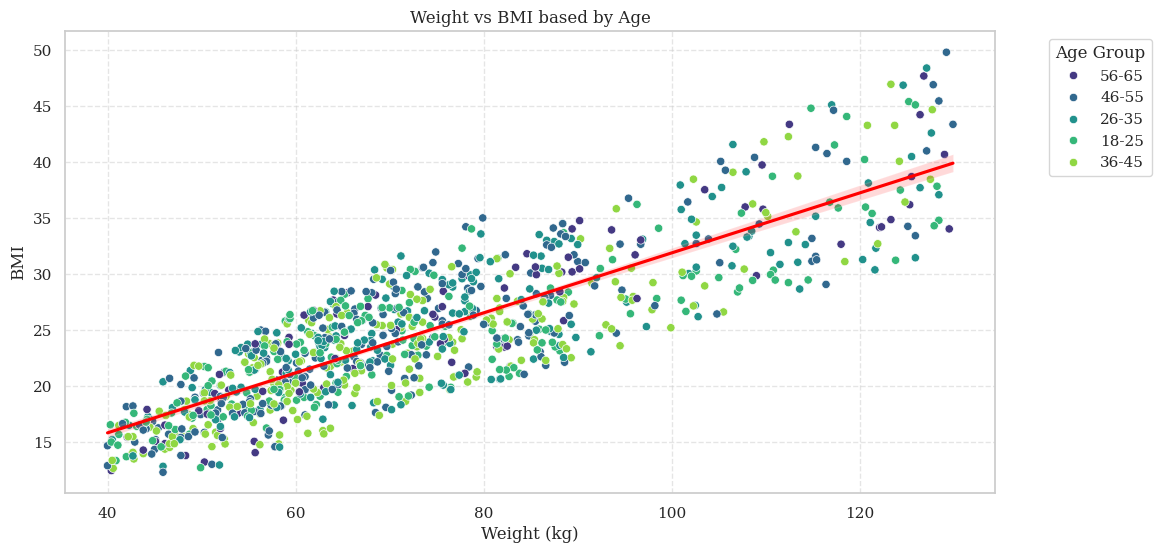

In [17]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Apply the age group function
data['Age Group'] = data['Age'].apply(age_group)

# Plot the weight vs BMI
sns.scatterplot(data=data, x='Weight (kg)', y='BMI', hue='Age Group', palette='viridis')
plt.title('Weight vs BMI based by Age')

# Add trendline
sns.regplot(data=data, x='Weight (kg)', y='BMI', scatter=False, color='red')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Place the legend in the outside the plot
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

### Calories Burned vs Different Workouts Based by Gender

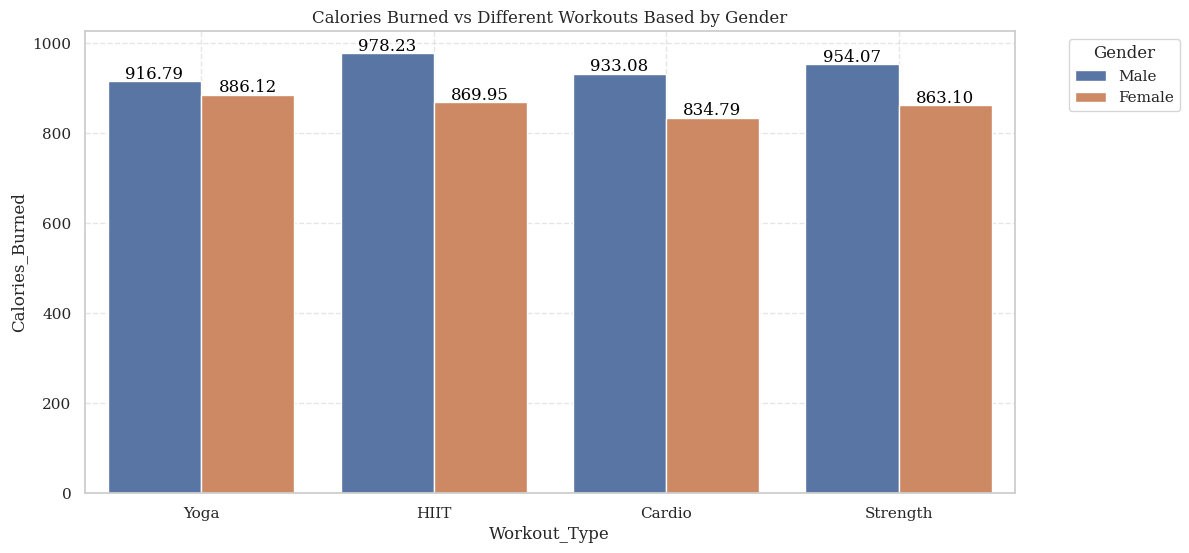

In [18]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Plot the calories burned vs different workouts
sns.barplot(data=data, x='Workout_Type', y='Calories_Burned', hue='Gender', ci=None)
plt.title('Calories Burned vs Different Workouts Based by Gender')

# Add annotations
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:
        plt.gca().annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                           ha='center', va='center', color='black', xytext=(0, 5),
                           textcoords='offset points')
# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Place the legend in the outside the plot
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

### Calories Bured vs Session Duration Based by Gender

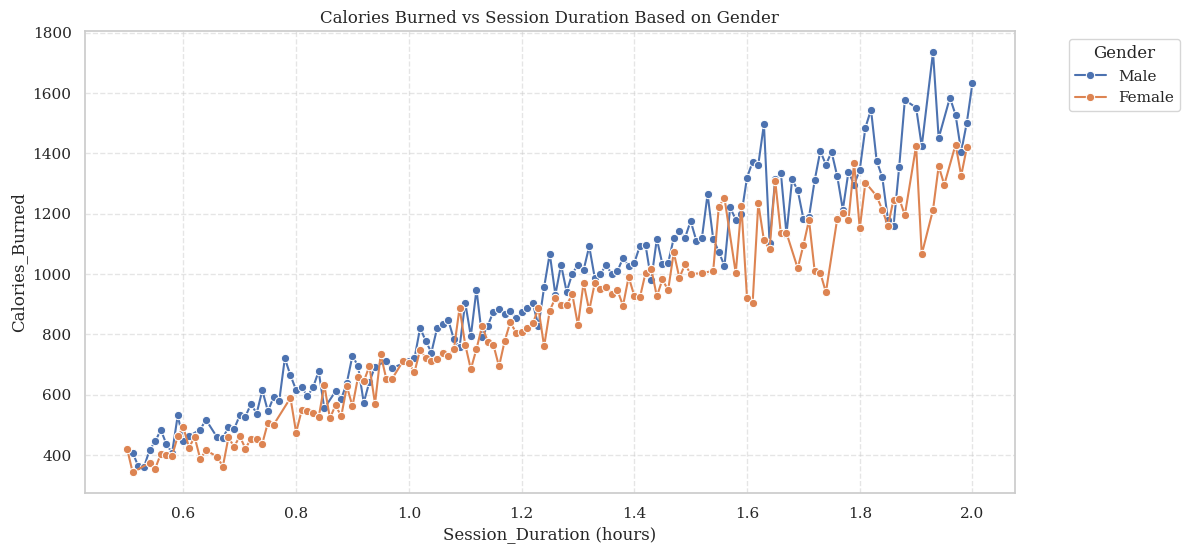

In [19]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Plot the calories burned vs session duration based on gender
sns.lineplot(data=data, x='Session_Duration (hours)', y='Calories_Burned', hue='Gender', ci=None, marker='o', style='Gender', dashes=False)
plt.title('Calories Burned vs Session Duration Based on Gender')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Place the legend outside the plot
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

### Calories Burned vs Session Duration Based by Age

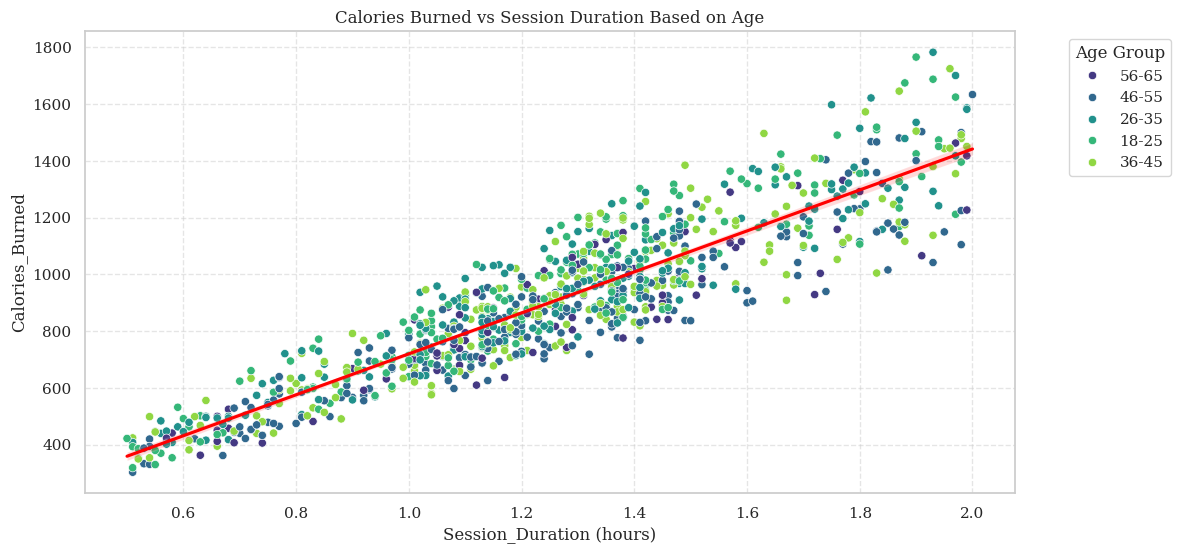

In [24]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Plot the calories burned vs session duration based on age group
sns.scatterplot(data=data, x='Session_Duration (hours)', y='Calories_Burned', hue='Age Group', palette='viridis')
plt.title('Calories Burned vs Session Duration Based on Age')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Add trendline
sns.regplot(data=data, x='Session_Duration (hours)', y='Calories_Burned', scatter=False, color='red')

# Place the legend outside the plot
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

### Calories Burned vs Session Duration Based by Experience Level

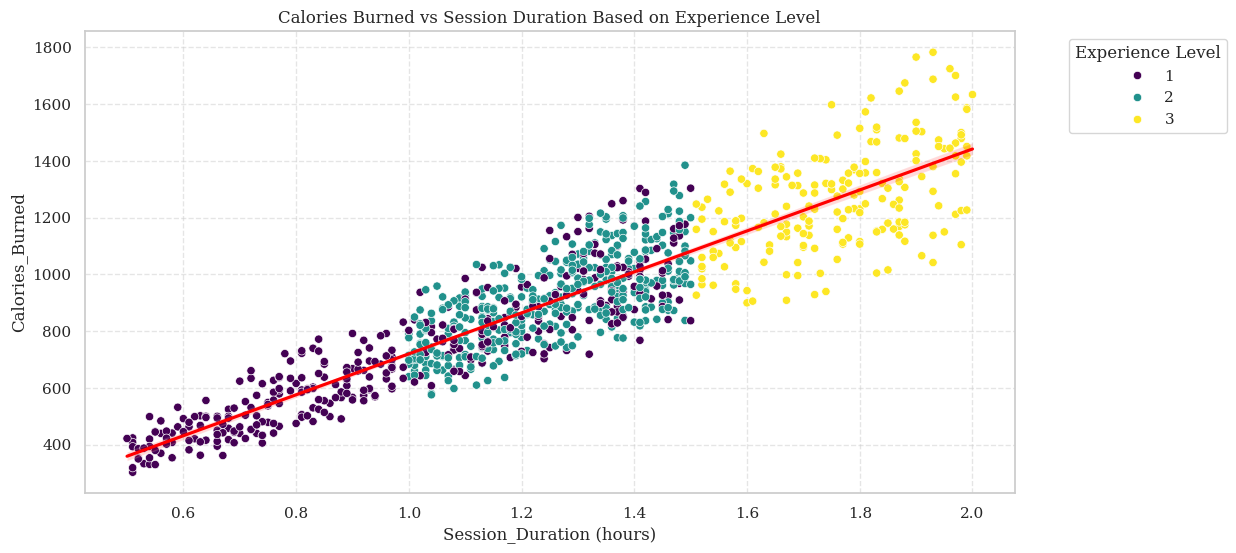

In [25]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Plot the calories burned vs BMI
sns.scatterplot(data=data, x='Session_Duration (hours)', y='Calories_Burned', hue='Experience_Level', palette='viridis')
plt.title('Calories Burned vs Session Duration Based on Experience Level')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Add trendline
sns.regplot(data=data, x='Session_Duration (hours)', y='Calories_Burned', scatter=False, color='red')

# Place the legend outside the plot
plt.legend(title='Experience Level', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()